<a href="https://colab.research.google.com/github/Kirankumarpetlu/NLP/blob/main/NLPweek7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

q1

In [ ]:
pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")

def dependency_parsing(sentence):
    # Process the sentence using spaCy
    doc = nlp(sentence)

    # Print Dependency Parsing Results
    print(f"\nProcessing Sentence: {sentence}")
    print(f"{'Token':<15}{'Dependency':<20}{'Head':<15}{'Children'}")
    print("-" * 60)

    for token in doc:
        children = [child.text for child in token.children]
        print(f"{token.text:<15}{token.dep_:<20}{token.head.text:<15}{children}")

    # Display Dependency Arcs Graphically
    spacy.displacy.render(doc, style="dep", jupyter=True)

# Example sentences
sentences = [
    "I wanted to try someplace new",
    "I booked a flight from Vijayawada to Delhi"
]

# Run the NLP-based Dependency Parser
for sentence in sentences:
    dependency_parsing(sentence)
#22BCE8674


Processing Sentence: I wanted to try someplace new
Token          Dependency          Head           Children
------------------------------------------------------------
I              nsubj               wanted         []
wanted         ROOT                wanted         ['I', 'try']
to             aux                 try            []
try            xcomp               wanted         ['to', 'new']
someplace      npadvmod            new            []
new            dobj                try            ['someplace']



Processing Sentence: I booked a flight from Vijayawada to Delhi
Token          Dependency          Head           Children
------------------------------------------------------------
I              nsubj               booked         []
booked         ROOT                booked         ['I', 'flight', 'to']
a              det                 flight         []
flight         dobj                booked         ['a', 'from']
from           prep                flight         ['Vijayawada']
Vijayawada     pobj                from           []
to             prep                booked         ['Delhi']
Delhi          pobj                to             []


In [ ]:
#2
import spacy

nlp=spacy.load("en_core_web_sm")
sentences=[
    "I prefer the morning flight through Denver",
    "The dog barked loudly at the stranger",
    "The quick brown fox jumps over the lazy dog",
    "I booked a flight from Vijayawada to delhi",
    "John saw a dog yesterday which was a Yorkshire Terrier"
]
for sentence in sentences:
    doc=nlp(sentence)
    print(f"\nDependency Parsing for '{sentence}'")
    print("-"*50)
    for token in doc:
        print(f"{token.text:12} --> Head:{token.head.text:12} |Dep: {token.dep_}")
#22bce8674


Dependency Parsing for 'I prefer the morning flight through Denver'
--------------------------------------------------
I            --> Head:prefer       |Dep: nsubj
prefer       --> Head:prefer       |Dep: ROOT
the          --> Head:flight       |Dep: det
morning      --> Head:flight       |Dep: compound
flight       --> Head:prefer       |Dep: dobj
through      --> Head:flight       |Dep: prep
Denver       --> Head:through      |Dep: pobj

Dependency Parsing for 'The dog barked loudly at the stranger'
--------------------------------------------------
The          --> Head:dog          |Dep: det
dog          --> Head:dog          |Dep: ROOT
barked       --> Head:dog          |Dep: acl
loudly       --> Head:barked       |Dep: advmod
at           --> Head:barked       |Dep: prep
the          --> Head:stranger     |Dep: det
stranger     --> Head:at           |Dep: pobj

Dependency Parsing for 'The quick brown fox jumps over the lazy dog'
------------------------------------------------

Graph-based Dependency Parsing using CLE Algorithm:
root --> John | Weight: 9
John --> saw | Weight: 20
John --> Mary | Weight: 30
saw --> 0 | Weight: 0
saw --> 11 | Weight: 11
saw --> 3 | Weight: 3


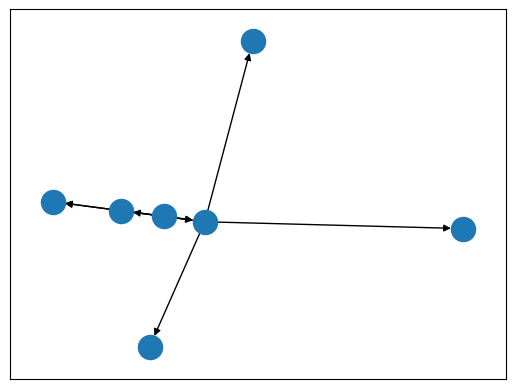

In [ ]:
import networkx as nx



G=nx.DiGraph()
edges=[
    ("root","John",9),
    ("root","saw",10),
    ("John","saw",20),
    ("John","Mary",30),
    ("saw","Mary",30),
    ("saw","0",0),
    ("saw","11",11),
    ("saw","3",3),
]

G.add_weighted_edges_from(edges)
mst=nx.maximum_spanning_arborescence(G)
print("Graph-based Dependency Parsing using CLE Algorithm:")
for edge in mst.edges(data=True):
    print(f"{edge[0]} --> {edge[1]} | Weight: {edge[2]['weight']}")
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)

In [ ]:
from prettytable import PrettyTable

class ArcDependencyParser:
    def __init__(self, sentence): # Added self as the first argument
        self.sentence = sentence.split()
        self.stack = ["root"]  # Stack starts with root
        self.buffer = self.sentence[:]  # Buffer holds words in order
        self.arcs = []  # Store dependency relations
        self.steps = []  # Store step-wise transitions
        self.step_count = 0  # Step counter

    def shift(self):
        if self.buffer:
            self.stack.append(self.buffer.pop(0))
            self.steps.append((self.step_count, list(self.stack), list(self.buffer), "SHIFT", ""))
            self.step_count += 1

    def left_arc(self, relation):
        if len(self.stack) > 1:
            dep = self.stack.pop(-2)
            head = self.stack[-1]
            self.arcs.append((head, relation, dep))
            self.steps.append((self.step_count, list(self.stack), list(self.buffer), "LEFTARC", f"({dep} ← {head})"))
            self.step_count += 1

    def right_arc(self, relation):
        if len(self.stack) > 1:
            dep = self.stack.pop()
            head = self.stack[-1]
            self.arcs.append((head, relation, dep))
            self.steps.append((self.step_count, list(self.stack), list(self.buffer), "RIGHTARC", f"({head} → {dep})"))
            self.step_count += 1

    def parse(self):
        self.steps.append((self.step_count, list(self.stack), list(self.buffer), "Initial State", ""))
        self.step_count += 1

        while self.buffer:
            self.shift()

        self.right_arc("ROOT")
        self.right_arc("OBJ")
        self.left_arc("DET")
        self.right_arc("NSUBJ")
        self.right_arc("PREP")
        self.right_arc("POBJ")

        self.display_steps()

        print("\nFinal Dependencies:")
        for arc in self.arcs:
            print(arc)

    def display_steps(self):
        table = PrettyTable()
        table.field_names = ["Step No", "Stack", "Buffer", "Action", "Added Arc"]

        for step in self.steps:
            table.add_row([step[0], "[" + ", ".join(step[1]) + "]", "[" + ", ".join(step[2]) + "]", step[3], step[4]])

        print(table)

# Example usage
sentence = "I booked a flight from Vijayawada to Delhi"
parser = ArcDependencyParser(sentence)
parser.parse()

+---------+-----------------------------------------------------------+-----------------------------------------------------+---------------+-----------------------+
| Step No |                           Stack                           |                        Buffer                       |     Action    |       Added Arc       |
+---------+-----------------------------------------------------------+-----------------------------------------------------+---------------+-----------------------+
|    0    |                           [root]                          | [I, booked, a, flight, from, Vijayawada, to, Delhi] | Initial State |                       |
|    1    |                         [root, I]                         |   [booked, a, flight, from, Vijayawada, to, Delhi]  |     SHIFT     |                       |
|    2    |                     [root, I, booked]                     |       [a, flight, from, Vijayawada, to, Delhi]      |     SHIFT     |                       |
|   

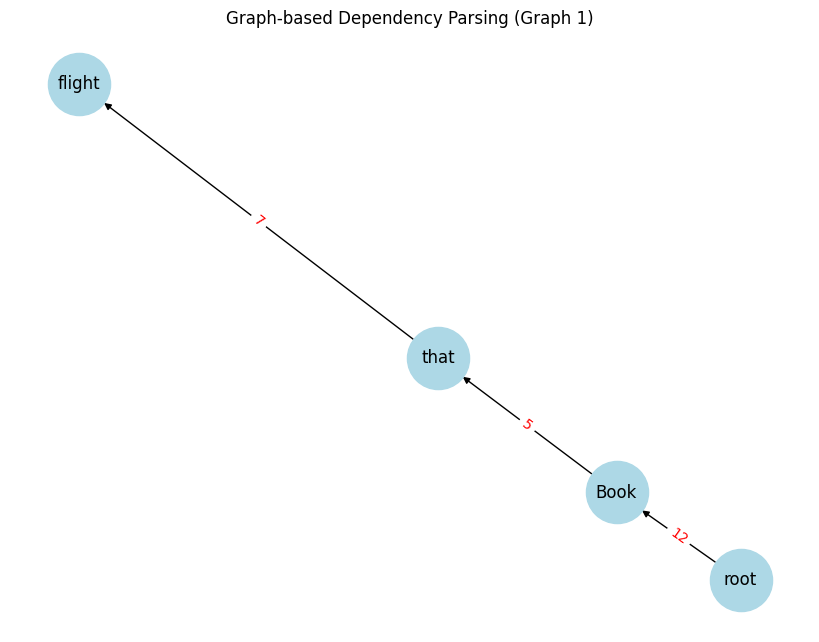

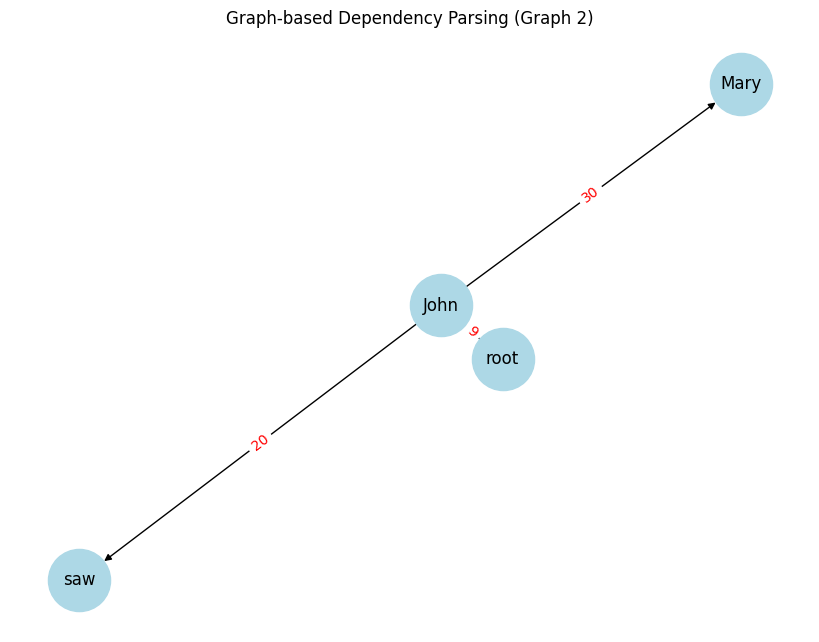

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_mst(graph_edges, title):
    """ Function to compute and draw MST for a given directed graph """
    G = nx.DiGraph()
    G.add_weighted_edges_from(graph_edges)

    # Compute Maximum Spanning Tree using CLE Algorithm
    mst = nx.maximum_spanning_arborescence(G)

    # Visualization setup
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(mst) # Compute node positions for visualization

    # Draw MST with labels
    nx.draw(mst, pos, with_labels=True, node_color="lightblue", edge_color="black", node_size=2000, font_size=12, arrows=True)

    # Add edge weight labels
    edge_labels = {(u, v): d["weight"] for u, v, d in mst.edges(data=True)}
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels, font_color="red")

    # Display graph title
    plt.title(title)
    plt.show()

# **Graph 1** (Left Diagram in Image)
graph_1_edges = [
    ("root", "Book", 12),
    ("root", "that", 4),
    ("Book", "that", 5),
    ("Book", "flight", 6),
    ("that", "flight", 7),
    ("that", "Book", 5)
]

# **Graph 2** (Right Diagram in Image)
graph_2_edges = [
    ("root", "John", 9),
    ("root", "saw", 10),
    ("John", "saw", 20),
    ("John", "Mary", 30),
    ("saw", "Mary", 30),
    ("saw", "0", 0),
    ("saw", "11", 11),
    ("saw", "3", 3)
]

# Draw MSTs for both graphs
draw_mst(graph_1_edges, "Graph-based Dependency Parsing (Graph 1)")
draw_mst(graph_2_edges, "Graph-based Dependency Parsing (Graph 2)")
#22BCE*